In [1]:
import pandas as pd
import numpy as np
import openpyxl

# GENESIS data

Prepare workbook for preprocessing

In [2]:
wb = openpyxl.load_workbook(filename='../data/mobility/raw_data/Luftverkehr_Frankfurt_insgesamt_monatlich.xlsx', 
                   read_only=True)

ws = wb['46421-0012']

# Read the cell values into a list of lists
data_rows = []
for row in ws['A10':'AO369']:
    data_cols = []
    for cell in row:
        data_cols.append(cell.value)
    data_rows.append(data_cols)

df1_tmp = pd.DataFrame(data_rows)
#print(df.head())

#drop rows of uniportant data
drop1 = 0
for n in range(10):
    df1_tmp = df1_tmp.drop(np.arange(drop1, drop1+26), axis=0)
    drop2 = drop1+27
    df1_tmp = df1_tmp.drop(np.arange(drop2, drop2+8), axis=0)
    drop1 = drop2+9

#rename columns and rows rows
df1_tmp.index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
print(df1_tmp.head())

d = {'...':'','-':''}
df1_tmp = df1_tmp.replace(d)

     0     1          2        3          4      5        6       7      8   \
0  2011  None  Insgesamt    Start  Insgesamt  79066  6317075  176163  78053   
1  2011  None  Insgesamt  Landung  Insgesamt  78857  6523942  159196  77947   
2  2012  None  Insgesamt    Start  Insgesamt  77119  6457080  163985  75792   
3  2012  None  Insgesamt  Landung  Insgesamt  76995  6647581  148354  75796   
4  2013  None  Insgesamt    Start  Insgesamt  70449  6165292  169570  69075   

        9   ...      31     32       33      34     35       36      37  \
0  6303610  ...  193433  98088  9322018  202033  86033  7339992  196797   
1  6224288  ...  173576  98213  9648513  178389  86247  7753619  175923   
2  6437701  ...  195415  96304  9423748  201864  81629  7216753  203397   
3  6330295  ...  172108  96503  9811052  174387  81784  7610018  183495   
4  6259454  ...  190747  92606  9624282  204897  78080  7271698  207427   

      38       39      40  
0  77580  7000250  194253  
1  77764  6938514 

In [3]:
year = np.zeros(120,)
month = np.zeros(120,)
#example values
values = np.zeros(120,)

#create dataframe in wrong format
df1 = pd.DataFrame({'year': year, 'month': month, 'M_AviationTotalStarts': values, 'M_AviationTotalLandings': values})
#print(df.head())

idx_df1 = 0
idx_df1_tmp = 0

for y in range(2011,2021):
    col_df1_tmp = 5
    for m in range(1,13):
        df1.year[idx_df1] = y
        df1.month[idx_df1] = m
        df1.M_AviationTotalStarts[idx_df1] = df1_tmp[col_df1_tmp][idx_df1_tmp]
        #df2.M_AviationTotalPassengernumberStarts[idx_df2] = df[col_df+1][idx_df]
        #df2.M_AviationTotalWeightFreightsStarts[idx_df2] = df[col_df+2][idx_df]
        df1.M_AviationTotalLandings[idx_df1] = df1_tmp[col_df1_tmp][idx_df1_tmp+1]
        #df2.M_AviationTotalPassengernumberLandings[idx_df2] = df[col_df+1][idx_df+1]
        #df2.M_AviationTotalWeightFreightsLandings[idx_df2] = df[col_df+2][idx_df+1]
        
        col_df1_tmp = col_df1_tmp+3
        idx_df1 = idx_df1+1
        
    idx_df1_tmp = idx_df1_tmp+2
df1['M_AviationTotalStarts'] = pd.to_numeric(df1['M_AviationTotalStarts'])
#print(df1.head())
        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\li

Combine year and month in one cell

In [4]:
#change datatype of year and month to change 2019.0 to 2019
df1.year = df1.year.astype('int16')
df1.month = df1.month.astype('int16')

#new column in format: yyyy-month as datatype string
df1['date'] = df1.year.astype('str') + '-' + df1.month.astype('str')

#drop old columns of year and month
df1 = df1.drop(['year', 'month'], axis=1)

#show df.head()
print(df1.head())

   M_AviationTotalStarts M_AviationTotalLandings    date
0                79066.0                   78857  2011-1
1                78053.0                   77947  2011-2
2                90877.0                   90670  2011-3
3                89391.0                   89174  2011-4
4                99138.0                   99151  2011-5


Use the date column as index

In [5]:
#change of datatype of column date to datetime with monthly period
df1.date = pd.to_datetime(df1.date).dt.to_period('m')

#set index of dataframe to date
df1 = df1.set_index('date')

#show df.head()
print(df1.head())

         M_AviationTotalStarts M_AviationTotalLandings
date                                                  
2011-01                79066.0                   78857
2011-02                78053.0                   77947
2011-03                90877.0                   90670
2011-04                89391.0                   89174
2011-05                99138.0                   99151


In [6]:
#Add Starts and Landings and drop them
df1['M_AviationTotalStartsAndLandings'] = df1['M_AviationTotalStarts'] + df1['M_AviationTotalLandings']
df1= df1.drop(['M_AviationTotalStarts', 'M_AviationTotalLandings'], axis=1)
print(df1.head())

        M_AviationTotalStartsAndLandings
date                                    
2011-01                           157923
2011-02                           156000
2011-03                           181547
2011-04                           178565
2011-05                           198289


Test Plot

In [7]:
df1.M_AviationTotalStartsAndLandings.plot()

# OAG data

In [8]:
wb = openpyxl.load_workbook(filename='../data/mobility/raw_data/OAG_planed flights.xlsx', 
                   read_only=True)

ws = wb[' Summary Table']

# Read the cell values into a list of lists
data_rows = []
for row in ws['B7':'L11']:
    data_cols = []
    for cell in row:
        data_cols.append(cell.value)
    data_rows.append(data_cols)

df2_tmp = pd.DataFrame(data_rows)


df2_tmp = df2_tmp.drop(np.arange(1, 4), axis=0)
df2_tmp = df2_tmp.drop(0, axis=1)
df2_tmp.columns = df2_tmp.iloc[0]
df2_tmp = df2_tmp.drop(df2_tmp.index[0])
print(df2_tmp)

0    January   February    March    April      May  2020-06-01 00:00:00  \
4 -0.0854731 -0.0687385 -0.30723 -0.92905 -0.912995           -0.913618   

0 2020-06-08 00:00:00 2020-06-15 00:00:00 2020-06-22 00:00:00  \
4            -0.88762           -0.849156           -0.837677   

0 2020-06-29 00:00:00  
4           -0.762457  


In [9]:
import datetime as dt
import calendar

new_col = calendar.month_name[df2_tmp.columns[-1].month]
df2_tmp[new_col] = 0
i = 0
for col in df2_tmp.columns:
    if type(col) is not str:
        df2_tmp[new_col] = df2_tmp[new_col] + df2_tmp[col][4]
        i = i+1
        df2_tmp = df2_tmp.drop(col, axis=1)
df2_tmp.June = df2_tmp.June / i
print(df2_tmp)

0    January   February    March    April      May       June
4 -0.0854731 -0.0687385 -0.30723 -0.92905 -0.912995 -0.850106


In [10]:
n_months = df2_tmp.shape[1]
year = np.zeros(n_months,)
year[:] = 2020 
month = np.arange(1,n_months + 1)
#example values
#values = np.empty(12,)
#values[:] = np.nan

#create dataframe in wrong format
df2 = pd.DataFrame({'year': year, 'month': month, 'M_DifferencePercent': df2_tmp.values[0]})
print(df2.head())

     year  month M_DifferencePercent
0  2020.0      1          -0.0854731
1  2020.0      2          -0.0687385
2  2020.0      3            -0.30723
3  2020.0      4            -0.92905
4  2020.0      5           -0.912995


Combine year and month in one cell

In [11]:
#change datatype of year and month to change 2019.0 to 2019
df2.year = df2.year.astype('int16')
df2.month = df2.month.astype('int16')

#new column in format: yyyy-month as datatype string
df2['date'] = df2.year.astype('str') + '-' + df2.month.astype('str')

#drop old columns of year and month
df2 = df2.drop(['year', 'month'], axis=1)

#show df.head()
print(df2.head())

  M_DifferencePercent    date
0          -0.0854731  2020-1
1          -0.0687385  2020-2
2            -0.30723  2020-3
3            -0.92905  2020-4
4           -0.912995  2020-5


Use the date column as index

In [12]:
#change of datatype of column date to datetime with monthly period
df2.date = pd.to_datetime(df2.date).dt.to_period('m')

#set index of dataframe to date
df2 = df2.set_index('date')

#show df.head()
print(df2.head())

        M_DifferencePercent
date                       
2020-01          -0.0854731
2020-02          -0.0687385
2020-03            -0.30723
2020-04            -0.92905
2020-05           -0.912995


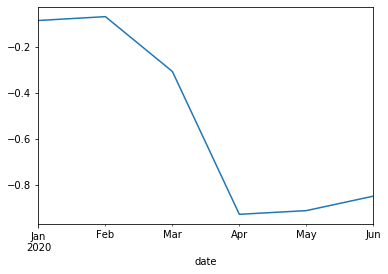

In [13]:
df2.M_DifferencePercent.plot()

# Combine both dataframes

In [14]:
df1['M_AviationTotalStartsAndLandings']['2019-01']

160648.0

In [15]:
# Aproximate values for 2020
df2['M_AviationTotalStartsAndLandings'] = df1['M_AviationTotalStartsAndLandings'][df2.index-12].values * (1+df2['M_DifferencePercent'])
print(df2.head(12))

        M_DifferencePercent M_AviationTotalStartsAndLandings
date                                                        
2020-01          -0.0854731                           146917
2020-02          -0.0687385                           146435
2020-03            -0.30723                           121766
2020-04            -0.92905                          13014.1
2020-05           -0.912995                          17246.1
2020-06           -0.850106                          29596.2


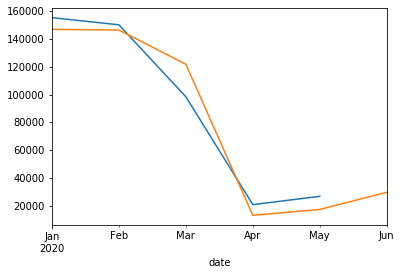

In [16]:
# Compare dataframes
df1.M_AviationTotalStartsAndLandings['2020-01':'2020-06'].plot()
df2.M_AviationTotalStartsAndLandings['2020-01':'2020-06'].plot()

In [17]:
# Add missing values to df1
for i in df2.index:
    if np.isnan(df1['M_AviationTotalStartsAndLandings'][i]):
        df1['M_AviationTotalStartsAndLandings'][i] = df2['M_AviationTotalStartsAndLandings'][i]

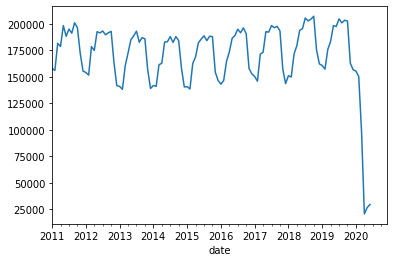

In [18]:
df1.M_AviationTotalStartsAndLandings.plot()

Save dateframe in csv format

In [19]:
df1.to_csv('../data/mobility/Aviation_Final_monthly.csv')